### 导入包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # 图片输出为矢量图，保证清晰度

import warnings
warnings.filterwarnings('ignore')


### 导入数据

In [2]:
data=pd.read_csv('./clean-data.csv')
data=data.drop(['Unnamed: 0'],axis=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

In [3]:
data

,Group,Age,Gender,APG_0101010001P,APG_0101010002M,APG_0101010006P,APG_0101010009P,APG_0101010010M,APG_0101010012P,APG_0101010014M,...,APG_0101010363P,APG_0101010364P,APG_0101010365P,APG_0101020006P,APG_0101020009M,APG_0101020013M,APG_0101020024P,APG_0101020027M,APG_0101020028P,APG_0101020029M
0,0,63,1,0.37,0.06,2.44,2.09,0.05,0.00,15.76,...,145.87,3606.19,54.99,9.42,3.97,0.37,2.26,0.81,1.26,66.17
1,0,32,1,0.62,0.01,1.43,4.36,0.23,0.05,26.34,...,26.92,1000.12,53.17,1.22,1.59,0.38,1.91,0.76,0.94,74.75
2,0,57,0,1.29,0.01,0.64,2.42,0.16,0.10,22.15,...,49.47,1078.23,64.92,1.12,3.19,2.17,1.70,3.22,0.94,16.29
3,0,49,0,2.10,0.02,0.90,1.77,0.14,0.03,26.89,...,59.92,957.93,37.02,0.64,5.95,0.27,1.20,3.10,1.34,23.15
4,0,71,0,1.47,0.13,0.33,2.40,0.04,2.12,12.53,...,86.71,1085.73,20.68,0.66,1.38,0.88,1.83,1.07,0.98,38.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,65,1,1.37,0.10,0.93,4.30,0.06,0.04,10.76,...,19.22,532.70,23.75,2.73,3.36,0.41,1.55,1.24,0.82,8.20
161,1,72,1,1.26,0.05,1.11,1.55,0.23,0.54,9.76,...,44.02,510.87,83.40,0.73,8.37,0.31,3.27,0.59,0.55,23.13
162,1,57,1,1.22,0.03,0.68,1.81,0.12,0.07,24.61,...,9.93,528.38,17.74,13.62,19.15,0.22,2.64,6.53,0.24,38.99
163,1,71,1,1.95,2.52,2.10,3.00,0.08,0.12,14.46,...,59.98,1167.03,181.15,5.55,4.66,23.34,0.84,7.77,32.29,161.63


In [4]:
print("cancer count:",np.sum(data['Group']==1) )#患癌人数
print("health count:",np.sum(data['Group']==0)) #健康人数

cancer count: 87
health count: 78


In [5]:
data.describe()

,Group,Age,Gender,APG_0101010001P,APG_0101010002M,APG_0101010006P,APG_0101010009P,APG_0101010010M,APG_0101010012P,APG_0101010014M,...,APG_0101010363P,APG_0101010364P,APG_0101010365P,APG_0101020006P,APG_0101020009M,APG_0101020013M,APG_0101020024P,APG_0101020027M,APG_0101020028P,APG_0101020029M
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.527273,58.290909,0.369697,3.146788,1.187515,0.876121,3.276121,0.525636,1.154545,15.039636,...,38.447636,892.052182,39.101576,1.853818,3.643333,2.272242,2.389636,2.735758,2.526061,38.656121
std,0.500775,11.516170,0.484192,6.534125,12.125404,0.840008,1.942024,2.028801,5.613172,10.342100,...,19.657078,387.495162,40.508028,1.865807,3.552409,8.940548,3.266942,3.569626,7.487163,45.604516
min,0.000000,26.000000,0.000000,0.300000,0.000000,0.180000,0.520000,0.020000,0.000000,4.760000,...,0.000000,427.930000,0.580000,0.270000,0.760000,0.100000,0.690000,0.390000,0.230000,6.120000
25%,0.000000,51.000000,0.000000,0.840000,0.020000,0.410000,2.220000,0.090000,0.030000,7.560000,...,25.470000,620.050000,10.680000,0.850000,1.760000,0.250000,1.200000,1.200000,0.680000,14.970000
50%,1.000000,60.000000,0.000000,1.510000,0.050000,0.630000,2.730000,0.150000,0.100000,10.760000,...,34.750000,825.970000,27.130000,1.220000,2.680000,0.370000,1.460000,1.920000,1.040000,22.920000
75%,1.000000,66.000000,1.000000,3.320000,0.100000,1.070000,3.810000,0.280000,0.320000,19.290000,...,49.460000,1065.920000,51.710000,2.150000,4.430000,0.560000,2.260000,2.920000,1.520000,41.280000
max,1.000000,82.000000,1.000000,73.750000,155.070000,5.860000,15.730000,20.310000,60.180000,58.290000,...,145.870000,3606.190000,222.850000,13.620000,30.940000,68.360000,23.300000,33.360000,71.470000,313.370000


### 数据归一化

In [6]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(data=X,columns=column)

In [7]:
X

,Age,Gender,APG_0101010001P,APG_0101010002M,APG_0101010006P,APG_0101010009P,APG_0101010010M,APG_0101010012P,APG_0101010014M,APG_0101010016P,...,APG_0101010363P,APG_0101010364P,APG_0101010365P,APG_0101020006P,APG_0101020009M,APG_0101020013M,APG_0101020024P,APG_0101020027M,APG_0101020028P,APG_0101020029M
0,0.410156,1.305725,-0.426261,-0.093271,1.867409,-0.612625,-0.235156,-0.206311,0.069866,-0.872725,...,5.481454,7.025636,0.393423,4.067524,0.092236,-0.213413,-0.039802,-0.541127,-0.169612,0.605151
1,-2.289906,1.305725,-0.387884,-0.097407,0.661380,0.559817,-0.146163,-0.197376,1.095983,-0.043448,...,-0.588222,0.279737,0.348357,-0.340736,-0.579771,-0.212292,-0.147262,-0.555176,-0.212482,0.793863
2,-0.112437,-0.765858,-0.285033,-0.097407,-0.281950,-0.442182,-0.180772,-0.188442,0.689609,-0.373522,...,0.562440,0.481927,0.639306,-0.394495,-0.128001,-0.011471,-0.211738,0.136069,-0.212482,-0.491930
3,-0.809227,-0.765858,-0.160691,-0.096580,0.028513,-0.777903,-0.190660,-0.200950,1.149325,-0.215305,...,1.095673,0.170527,-0.051543,-0.652540,0.651301,-0.224632,-0.365252,0.102350,-0.158895,-0.341048
4,1.106946,-0.765858,-0.257401,-0.087480,-0.652117,-0.452511,-0.240100,0.172522,-0.243401,-0.665406,...,2.462690,0.501341,-0.456148,-0.641788,-0.639066,-0.156196,-0.171824,-0.468068,-0.207123,-0.004753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.584354,1.305725,-0.272752,-0.089962,0.064336,0.528827,-0.230212,-0.199163,-0.415067,-0.166203,...,-0.981131,-0.930195,-0.380130,0.471029,-0.080001,-0.208926,-0.257792,-0.420299,-0.228558,-0.669864
161,1.194045,1.305725,-0.289638,-0.094098,0.279272,-0.891532,-0.146163,-0.109816,-0.512053,-0.095278,...,0.284342,-0.986703,1.096900,-0.604156,1.334603,-0.220145,0.270297,-0.602945,-0.264730,-0.341488
162,-0.112437,1.305725,-0.295778,-0.095753,-0.234186,-0.757243,-0.200548,-0.193803,0.928196,0.232069,...,-1.455173,-0.941378,-0.528947,6.325413,4.378402,-0.230242,0.076869,1.066160,-0.306260,0.007343
163,1.106946,1.305725,-0.183717,0.110227,1.461419,-0.142615,-0.220324,-0.184868,-0.056217,0.567598,...,1.098735,0.711789,3.517348,1.987040,0.287062,2.363601,-0.475782,1.414593,3.987431,2.704737


### 样本层面数据分析

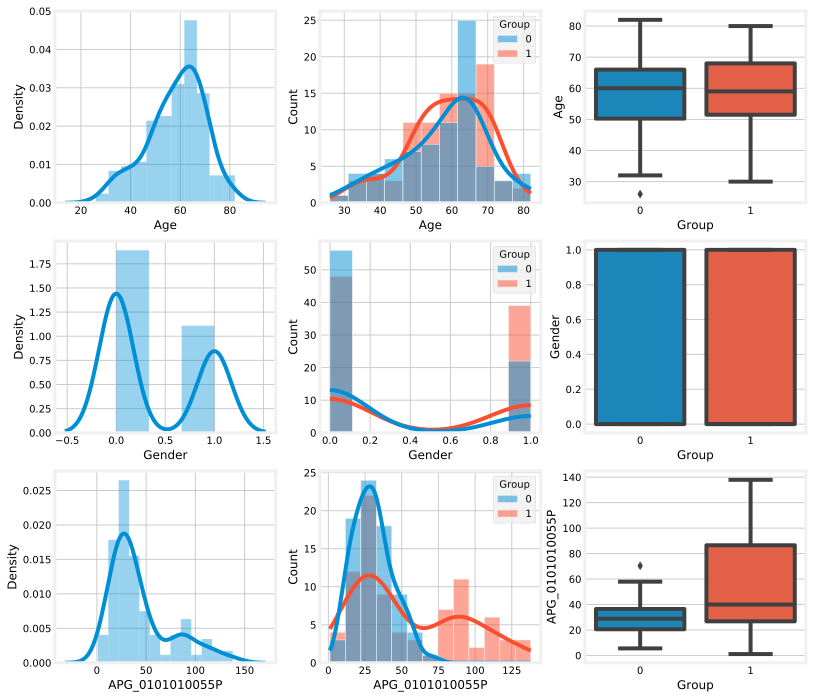

In [8]:
df=data
fig,ax = plt.subplots(3,3,figsize=(12,12))
for a in ax.flat:
    a.set_facecolor('white')
sns.distplot(df['Age'],ax=ax[0][0])
sns.histplot(data =df,x='Age',ax=ax[0][1],hue='Group',kde=True)
sns.boxplot(x=df['Group'],y=df['Age'],ax=ax[0][2])
sns.distplot(df['Gender'],ax=ax[1][0])
sns.histplot(data =df,x='Gender',ax=ax[1][1],hue='Group',kde=True)
sns.boxplot(x=df['Group'],y=df['Gender'],ax=ax[1][2])
sns.distplot(df['APG_0101010055P'],ax=ax[2][0])
sns.histplot(data =df,x='APG_0101010055P',ax=ax[2][1],hue='Group',kde=True)
sns.boxplot(x=df['Group'],y=df['APG_0101010055P'],ax=ax[2][2])
plt.savefig('./Sample based explanation.jpg', dpi=500, bbox_inches='tight',facecolor='white')
plt.show()